1. Importing DataSet and checking 

In [2]:
# importing the libraries:
from keras.datasets import mnist
# train and test split:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 9s 1us/step


In [3]:
# import libs:
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
# shaping dataset
x_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [9]:
x_test.shape

(10000, 28, 28)

In [10]:
y_test.shape

(10000,)

In [11]:
# single image:
single_img = x_train[10]

In [12]:
single_img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 118,
        219, 166, 118, 118,   6,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 103, 242, 254,
        254, 254, 254, 254,  66,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [13]:
# shaping the data:
single_img.shape

(28, 28)

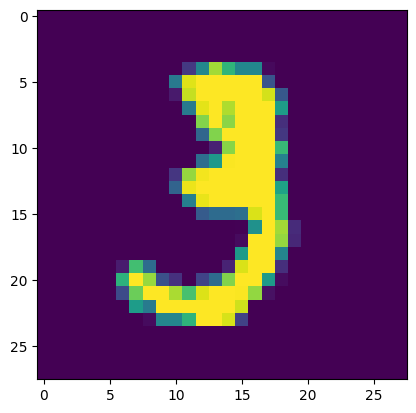

In [14]:
# showing the result:
plt.imshow(single_img)

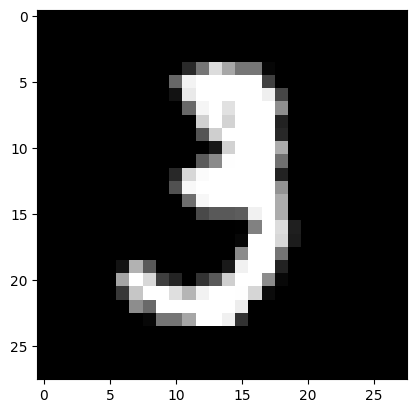

In [15]:
# changing the color to gray:
plt.imshow(single_img, cmap="gray")

2. DATA PREPROCESSING:

In [17]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [18]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [20]:
from keras.utils import to_categorical

In [21]:
y_train.shape

(60000,)

In [22]:
# example fot test dataset:
y_example = to_categorical(y_train)

In [23]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [24]:
# checking test dataset:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [25]:
y_example[10]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [26]:
y_cp_test = to_categorical(y_test,10)

In [27]:
y_cp_train = to_categorical(y_train,10)

3. Processing X Data

In [28]:
single_img.max()

254

In [29]:
single_img.min()

0

In [30]:
#normalization
x_train = x_train/255
x_test = x_test/255

In [31]:
scaled_single = x_train[0]

In [34]:
scaled_single.max()

1.0

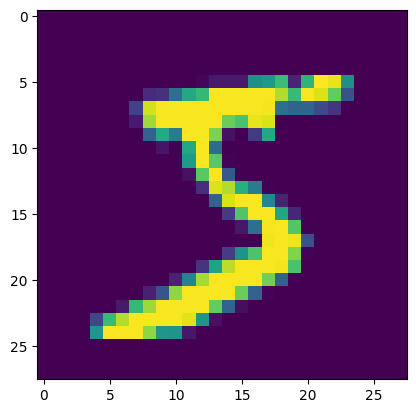

In [35]:
plt.imshow(scaled_single)

4. Reshaping the Data

In [36]:
x_train.shape

(60000, 28, 28)

In [37]:
x_test.shape

(10000, 28, 28)

In [38]:
x_train = x_train.reshape(60000, 28, 28)

In [39]:
x_train.shape

(60000, 28, 28)

In [40]:
x_test = x_test.reshape(10000, 28, 28)

In [41]:
x_test.shape

(10000, 28, 28)

5. Training the model:

In [42]:
# importing libs:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [43]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 25, 25, 32)     │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 591,786 (2.26 MB)

 Trainable params: 591,786 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
model.fit(x_train, y_cp_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.9147 - loss: 0.2836
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9834 - loss: 0.0537
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9898 - loss: 0.0346
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9924 - loss: 0.0253
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9956 - loss: 0.0146
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.9965 - loss: 0.0108
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9968 - loss: 0.0097
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.9982 - loss: 0.0061
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9986 - loss: 0.0052
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9991 - loss: 0.0028


6. Evaluation of the model:

In [49]:
model.metrics_names

['loss', 'compile_metrics']

In [50]:
model.evaluate(x_test, y_cp_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9838 - loss: 0.0744


[0.056771986186504364, 0.9876999855041504]

In [51]:
# importing libraries:
from sklearn.metrics import classification_report

In [52]:
# predicition:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [53]:
# import libs:
import numpy as np

In [54]:
y_pred = [np.argmax(i) for i in predictions]

In [55]:
y_cp_test.shape

(10000, 10)

In [56]:
y_cp_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [57]:
predictions[0]

array([1.2638134e-17, 6.0487602e-17, 1.9652132e-14, 7.7218065e-15,
       2.7721843e-20, 2.1327241e-16, 8.8068568e-28, 1.0000000e+00,
       9.5351086e-18, 2.5319579e-12], dtype=float32)

In [58]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      0.98      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.98       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



# Final Note:
By training and evaluating the model, We have finally got 99% accuracy by using keras sequential model on the proposed mnist data set. 